In [17]:
#%pip install pandas
import pandas as pd
#Summary Statistics & Missing-Value Report
df = pd.read_csv("togo-dapaong_qc.csv")  
df.describe()
missing = df.isna().sum()
missing[missing > 0]
# Columns with >5% missing
threshold = 0.05 * len(df)
missing[missing > threshold]

Comments    525600
dtype: int64

In [18]:
#Outlier Detection & Basic Cleaning
#%pip install scipy
from scipy.stats import zscore
import numpy as np

# Relevant columns
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Z-score method
z_scores = df[cols].apply(zscore)
outliers = (z_scores.abs() > 3)

# View rows with outliers
df[outliers.any(axis=1)]


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
4985,2021-10-28 11:06,1139.0,805.1,466.1,1172.0,1154.0,29.8,70.8,2.2,2.6,0.4,298.6,13.4,977,0,0.0,44.7,50.2,NaN
5410,2021-10-28 18:11,-1.2,0.0,0.0,0.0,0.0,29.7,63.5,6.6,9.7,1.6,122.1,14.3,976,0,0.0,30.0,29.5,NaN
5411,2021-10-28 18:12,-1.0,0.0,0.0,0.0,0.0,29.3,62.4,6.9,8.9,1.2,128.7,10.8,976,0,0.0,29.9,29.5,NaN
5413,2021-10-28 18:14,-0.8,0.0,0.0,0.0,0.0,28.6,63.7,7.1,8.9,1.1,127.9,14.4,976,0,0.0,29.5,29.2,NaN
5420,2021-10-28 18:21,-1.3,0.0,0.0,0.0,0.0,27.7,64.5,6.1,8.9,1.3,123.2,14.4,977,0,0.0,28.4,28.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510473,2022-10-14 11:54,709.5,63.7,629.8,703.1,694.9,30.2,66.6,3.5,4.4,0.8,167.0,15.2,977,0,0.0,46.8,51.6,NaN
510474,2022-10-14 11:55,677.8,40.6,621.7,670.1,662.2,30.2,66.7,2.8,3.6,0.6,175.1,19.7,977,0,0.0,46.8,51.6,NaN
510475,2022-10-14 11:56,659.5,29.7,614.9,651.0,643.4,30.3,66.1,4.1,4.9,0.5,174.0,11.5,977,0,0.0,46.8,51.6,NaN
510476,2022-10-14 11:57,660.1,40.7,605.6,653.2,645.6,30.2,66.0,3.7,4.6,0.7,165.4,21.6,977,0,0.0,46.6,51.4,NaN


In [19]:
# Impute missing values
df[cols] = df[cols].fillna(df[cols].median())
#Export Cleaned Data 
df.to_csv("data/togo_clean.csv", index=False)


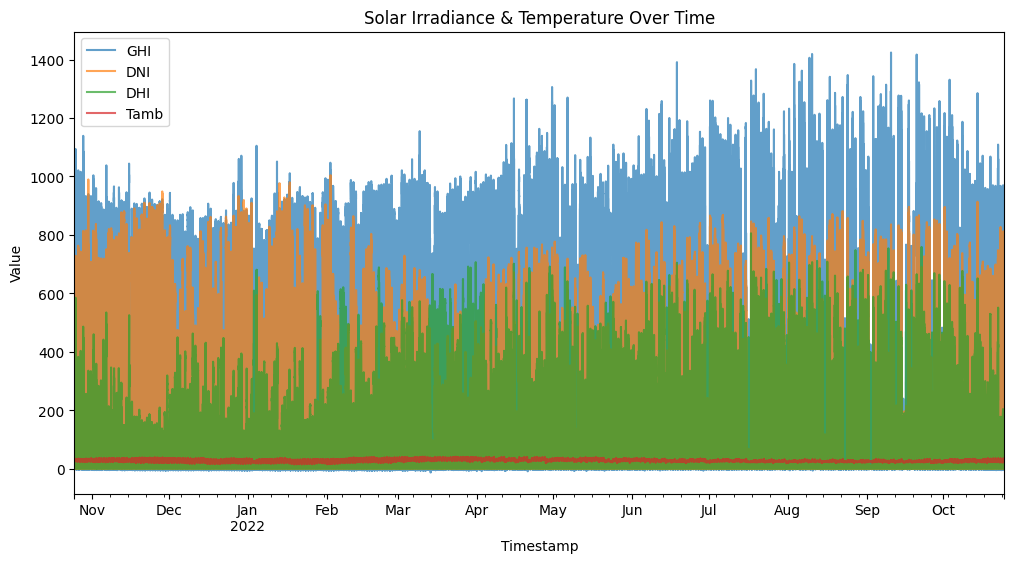

In [20]:
#Time series analysis
import matplotlib.pyplot as plt
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb over time
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12,6), alpha=0.7)
plt.title("Solar Irradiance & Temperature Over Time")
plt.ylabel("Value")
plt.show()


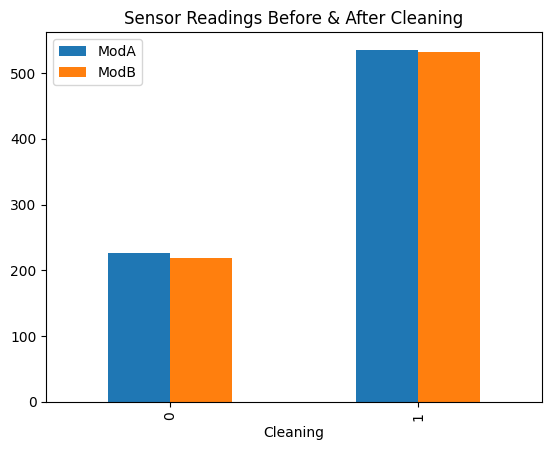

In [21]:
# impact of cleaning data
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Sensor Readings Before & After Cleaning")
plt.show()

<Axes: xlabel='WS', ylabel='GHI'>

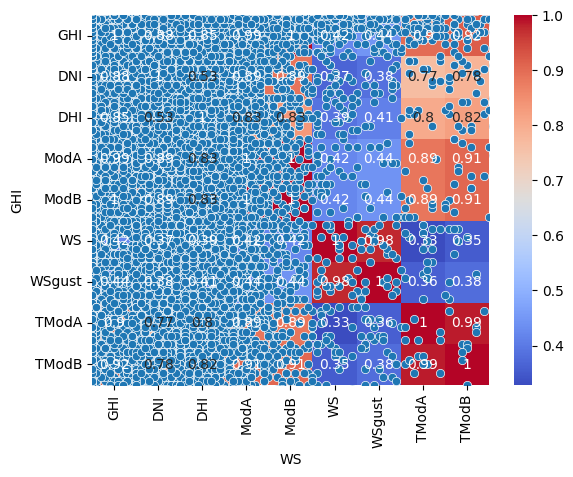

In [22]:
# correlation analysis
import seaborn as sns

# Heatmap
sns.heatmap(df[cols + ['TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')

# Scatter: wind vs GHI
sns.scatterplot(x='WS', y='GHI', data=df)
sns.scatterplot(x='RH', y='Tamb', data=df)


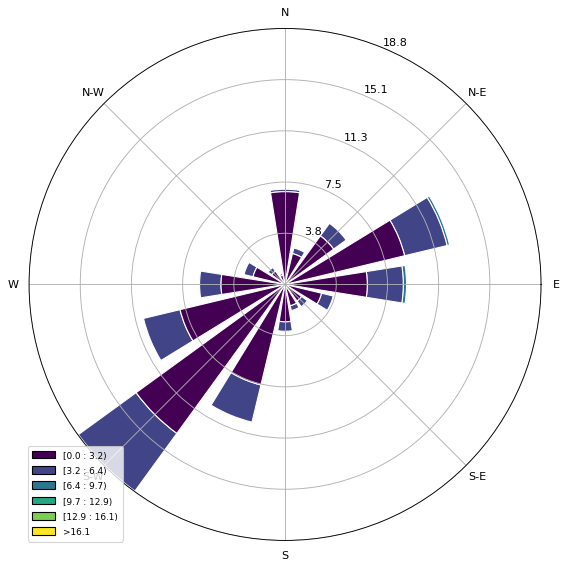

In [23]:
#wind and distribution analysis
#%pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


array([[<Axes: title={'center': 'GHI'}>, <Axes: title={'center': 'WS'}>]],
      dtype=object)

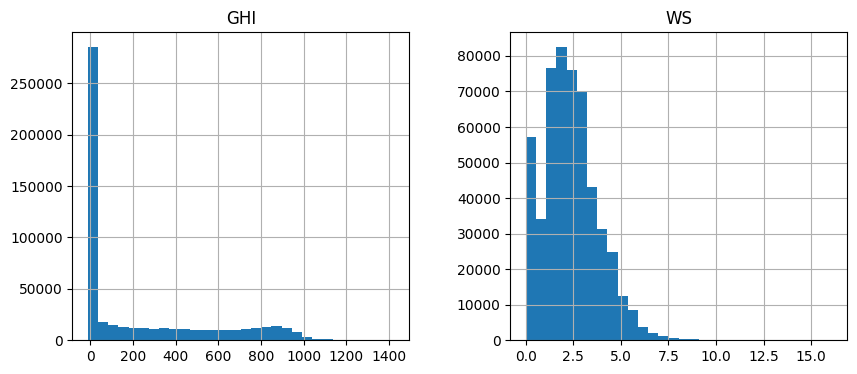

In [24]:
#Histogram
df[['GHI', 'WS']].hist(bins=30, figsize=(10,4))


<Axes: xlabel='RH', ylabel='Tamb'>

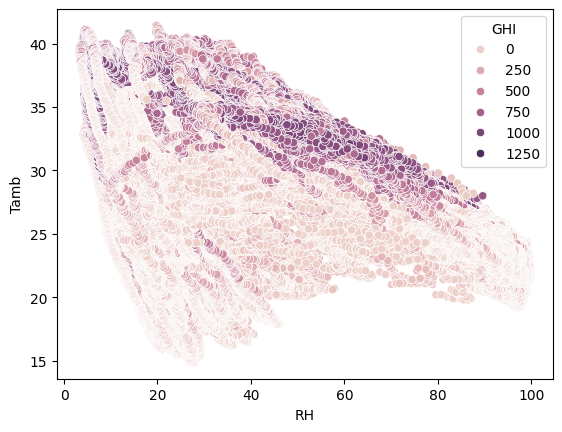

In [25]:
# Temperature analysis
sns.scatterplot(x='RH', y='Tamb', hue='GHI', data=df)


Text(0.5, 1.0, 'Bubble Chart: GHI vs Tamb (Bubble = RH)')

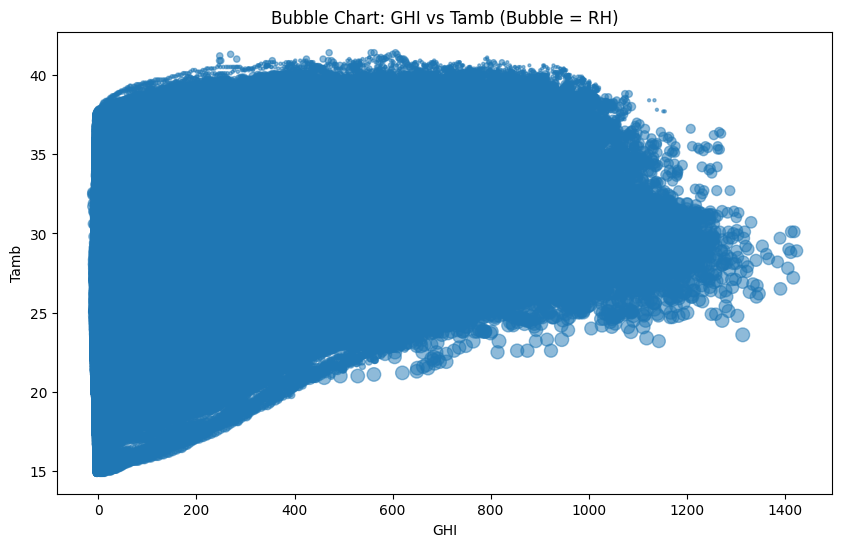

In [26]:
#Bubble chart
plt.figure(figsize=(10,6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb (Bubble = RH)')